In [63]:
import numpy as np # linear algebra
import pandas as pd # data load/processing
import matplotlib.pyplot as plt # plot graph
import seaborn as sns #visualization tool
from sklearn.linear_model import LinearRegression

#Table shows the age in years and the retail value in thousands of dollars of a random sample of ten automobiles of the same make and model.
#Construct the scatter diagram in matplotlib and seaborn.
#Compute the linear correlation coefficient r. Interpret its value in the context of the problem.
#Compute the least squares regression line. Plot it on the scatter diagram.
#Interpret the meaning of the slope of the least squares regression line in the context of the problem.
#Suppose a four-year-old automobile of this make and model is selected at random. Use the regression equation to predict its retail value.
#Suppose a 20-year-old automobile of this make and model is selected at random. Use the regression equation to predict its retail value. Interpret the result.
#Comment on the validity of using the regression equation to predict the price of a brand new automobile of this make and model.
#predict the values as per regression line and add in new column to dataframe 
#Evaluate the regression model (MAE, MSE, RMSE)
#Run a polynomial transformation. Add to dataframe. Plot the graph.
#Evaluate the new model (MAE, MSE, RMSE) and analyze if its a better fit compared to linear regression.
#save dataframe to new csv


In [3]:
#load data in a datafrome
df=pd.read_csv('cars.csv')
df

,age,value
0,2,28.7
1,3,24.8
2,3,26.0
3,3,30.5
4,4,23.8
5,4,24.6
6,5,23.8
7,5,20.4
8,5,21.6
9,6,22.1


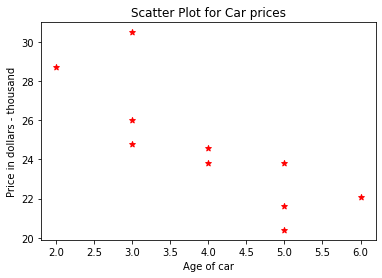

In [6]:
#create a scatterplot using matplotlib 
plt.xlabel("Age of car")
plt.ylabel("Price in dollars - thousand")
plt.title("Scatter Plot for Car prices") 
plt.scatter(df.age,df.value, color= 'red',marker = '*')

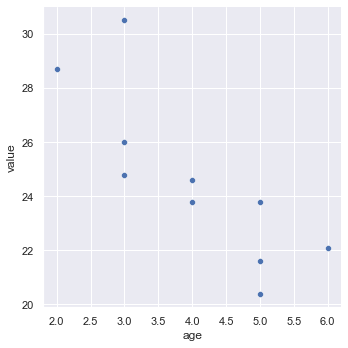

In [32]:
#create a scatterplot using seaborn 
sns.set_theme(style="darkgrid")
sns.relplot(x="age", y="value", data=df)
plt.show()

In [7]:
# correlation coefficient measures strength and direction of linear relationship between two varaibles car age and car value
np.corrcoef(df.age,df.value)

array([[ 1.        , -0.81868648],
       [-0.81868648,  1.        ]])

In [ ]:
#The age and value of this make and model automobile are moderately strongly negatively correlated. 
#As the age increases, the value of the automobile tends to decrease

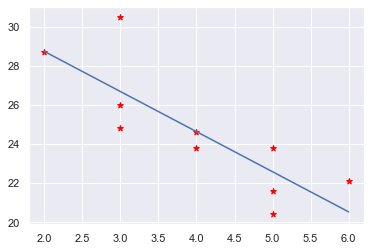

In [37]:
#Compute the least squares regression line. Plot it on the scatter diagram.
model = LinearRegression().fit(df[['age']],df.value)
plt.scatter(df.age,df.value, color= 'red',marker = '*')
plt.plot(df.age,model.predict(df[['age']]))

<AxesSubplot:xlabel='age'>

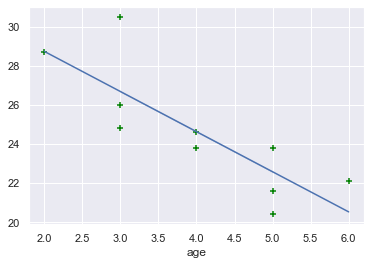

In [42]:
#plot line in seaborn
plt.scatter(df.age,df.value, color= 'green',marker = '+')
sns.lineplot(data=df, x=df.age, y=model.predict(df[['age']]))

In [26]:
# Print coefficient of determination (goodness of fit)
r_sq = model.score(df[['age']],df.value)
print('coefficient of determination:', r_sq)

# Print the Intercept:
print('intercept:', model.intercept_)

# Print the Slope:
print('slope:', model.coef_)

coefficient of determination: 0.6702475478748247
intercept: 32.83
slope: [-2.05]


In [38]:
#coefficient of determination - goodness of fit is 67% moderate
#meaning of the slope of the least squares regression line
#for every unit change in the age (1 year) the car value depreciates by 2.05 units of value (2050 dollars)

In [11]:
model.predict([[4]])

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([24.63])

In [17]:
#extrapolation should be avoided since value of x is outside our data range. negative value makes no sense.
model.predict([[20]])

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-8.17])

In [18]:
#value of brand new car
#extrapolation should be avoided since value of x is outside our data range
model.predict([[0]])

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([32.83])

In [31]:
#predict the values as per regression line and add in new column to dataframe 
predictedage= model.predict(df[['age']])
df['predicted']= predictedage
df

,age,value,predicted
0,2,28.7,28.73
1,3,24.8,26.68
2,3,26.0,26.68
3,3,30.5,26.68
4,4,23.8,24.63
5,4,24.6,24.63
6,5,23.8,22.58
7,5,20.4,22.58
8,5,21.6,22.58
9,6,22.1,20.53


In [44]:
#Evaluate the model
from sklearn import metrics
MAE= metrics.mean_absolute_error(df.value, df.predicted)
MSE= metrics.mean_squared_error(df.value, df.predicted)
RMSE=np.sqrt(MSE)
pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MAE,1.322000
MSE,2.894600
RMSE,1.701352


In [68]:
##Run a polynomial transformation. Add to dataframe. 

#Linear regression is linear in the model parameters and adding polynomial terms 
#to the model can be an effective way of allowing the model to identify nonlinear patterns.
#Polynomial regression extends the linear model by adding extra predictors, obtained by raising each of the original 
#predictors to a power. For example, a cubic regression uses three variables, X, X2, and X3, as predictors. 
#This approach provides a simple way to provide a non-linear fit to data.


#Let’s run a polynomial transformation on “experience” (X) with the same model and see if our errors reduce.

from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures()     #Linear Equation of degree 2
X_poly=pf.fit_transform(df[['age']]) 
model.fit(X_poly, df.value)
yp=model.predict(X_poly)

pf.get_feature_names(df.columns)
#features = DataFrame(pf.transform(df), columns=pf.get_feature_names(df.columns))
#features


c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1', 'age', 'age^2']

In [48]:
df['pred PolyTransform']= yp
df

,age,value,predicted,pred PolyTransform
0,2,28.7,28.73,29.504348
1,3,24.8,26.68,26.560870
2,3,26.0,26.68,26.560870
3,3,30.5,26.68,26.560870
4,4,23.8,24.63,24.213043
5,4,24.6,24.63,24.213043
6,5,23.8,22.58,22.460870
7,5,20.4,22.58,22.460870
8,5,21.6,22.58,22.460870
9,6,22.1,20.53,21.304348


<AxesSubplot:xlabel='age', ylabel='vals'>

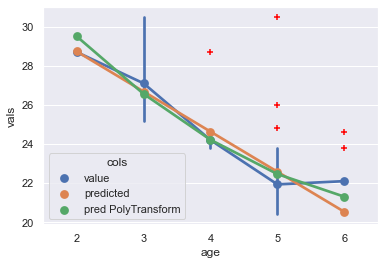

In [54]:
#Plot the linear regression and polynomial transformation
plt.scatter(df.age,df.value, color= 'red',marker = '+')
dfm = df.melt('age', var_name='cols', value_name='vals')
sns.pointplot(x="age", y="vals", hue='cols', data=dfm)

In [56]:
#Evaluate the new model (MAE, MSE, RMSE) and analyze if its a better fit compared to linear regression.
MAE_new= metrics.mean_absolute_error(df.value, df['pred PolyTransform'])
MSE_new= metrics.mean_squared_error(df.value, df['pred PolyTransform'])
RMSE_new=np.sqrt(MSE)
pd.DataFrame([MAE_new, MSE_new, RMSE_new], index=['MAE_new', 'MSE_new', 'RMSE_new'], columns=['Metrics'])

,Metrics
MAE_new,1.292174
MSE_new,2.731391
RMSE_new,1.701352


In [70]:
#since the MAE_new and MSE_new are less than MAE and MSE the Polynomial regression is a better fit.

In [71]:
#save dataframe to new csv
df.to_csv('car_pred.csv',index = False)